# 前言

**Notechat工具初衷是让用户有更精准可控的对话，包括不仅局限于精确指定上下文引用、修改AI生成的文本作为上下文、在程序中直接引用用户和AI生成的文本等等，使得用户更好利用LLM的长处，所以除了常见的对话外（虽然使用体验不及对话流），还可以辅助书写结构化的中长篇报告、文本对比分析、获取和沉淀知识、辅助编程创建分析模型等任务。**

# 安装NoteChat，创建工作环境

- **使用miniconda或conda来管理隔离的环境**，以免和其他代码环境冲突，这里以dev环境命名为例，可以改成任何你所需要的名字

- **移除dev环境**，确保dev命名的环境卸载干净：

  `conda env remove -n dev`
  
- **创建新的dev环境**，使用最新的jupyterlab：
  
  `conda create -n dev --override-channels --strict-channel-priority -c conda-forge -c nodefaults jupyterlab=4 nodejs=18`
  
- **激活环境**，并安装依赖包和你平时常用的工作环境包，这里plotly和jupyterlab-gridwidth不是必须

  `conda activate dev`
  
  `pip install pandas tabulate plotly jupyterlab-gridwidth`
  
- **cd到安装包文件夹并安装NoteChat**，假设NoteChat插件包在D盘Dapu文件夹下，这里是Windows演示，Linux同理

  `cd D:\Dapu`
  
  `pip install jupyterlab_notechat-0.1.1-py3-none-any.whl`
  
- 可以检查插件是否安装成功

  `jupyter labextension list`
  
  `jupyter server extension list`

- **设定OPENAI_API_KEY**，两种方式：

  **1. 一种是设定在系统变量中**
  
  - **Linux**中，在当前运行的命令行session中输入指令，可以存好每次启动的系列命令，因为这个key只在当前session适用
  
    `export OPENAI_API_KEY=your_key`
  
    `echo OPENAI_API_KEY`
  
  - **Windows**中，可以在`我的电脑->属性->高级系统设置->环境变量->系统变量`，新建一个`OPENAI_API_KEY`的变量，值设为`your_key`，设定好后长期适用，但需要重启一下当前运行的命令行terminal，这样这个session才能获得最新的key，或在当前powershell的session使用

    `$env:OPENAI_API_KEY = "your_key"`
  
    `echo $env:OPENAI_API_KEY`

  **2. 一种是在jupyterlab启动后**，在`菜单->Settings->Settings Editor->NoteChat`，在页面中更改`@openai_api_key`的`None`值为`your_key`

  - 这个页面还可以设置NoteChat其他变量，比如，对话流中`@num_prev_cells`为当前Cell向上最多可以看几个Cell，这里默认值为2
  
- **激活环境并定位到工作文件夹目录，启动jupyterlab**，这里以`D:\Dapu\dev`为例：

    `conda activate dev`
  
    `cd D:\Dapu\dev`
  
    `jupyter lab`
  
- 如果想指定的目标文件夹和端口，使用如下指令

    `conda activate dev`
  
    `jupyter lab --notebook-dir=D:\Dapu\dev --port=8889 --no-browser --ip 0.0.0.0`

- **启动notebook实例**，可以看到菜单栏和notebook工作栏有NoteChat的菜单或按钮，请查看菜单栏帮助`Alt+H`、`###使用说明README###.ipynb`和几个notebook example，有助于理解使用场景和运行机制，如果你想当成一个类似于openai的chatgpt来用，目前没有集成RAG模块，建议增加向上回溯的Cell数量`菜单->Settings->Settings Editor->NoteChat->Number of Cells Before the Active Cell As Context for AI Assistant`，比如设定为10或更多，因为新版的GPT能看很长的上下文，这样保证看到较多的单元格，但正如前言中所说，Notechat工具初衷是让用户有更精准可控的对话，善用单元格附加参数，将给报告自动化撰写、数据分析研究带来更为精准的提升：）

# NoteChat基础使用指南

主要的交互通过UI或快捷键，如下图所示：

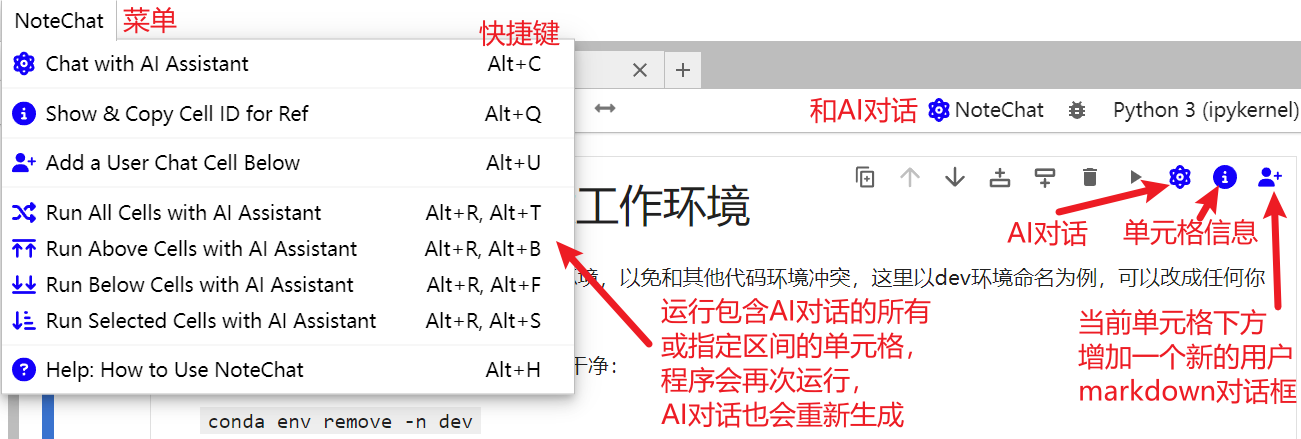

# NoteChat深度使用指南

**Notechat工具初衷是让用户有更精准可控的对话，包括不仅局限于精确指定上下文引用、修改AI生成的文本作为上下文、在程序中直接引用用户和AI生成的文本等等，使得用户更好利用LLM的长处，所以除了常见的对话外（虽然使用体验不及对话流），还可以辅助书写结构化的中长篇报告、文本对比分析、获取和沉淀知识、辅助编程创建分析模型等任务**

**1. 创建用户消息**：直接新建单元格输入你的问题，或使用`Add a User Chat Cell`指令或点击对应的菜单或单元格按钮，添加一个以**user**形式开头的markdown单元格，能够更明确这是用户创建的一个对话消息，不过截至4.0.10版本的jupyterlab的markdown单元格内的复制粘贴有弄乱文本bug，待官方修复（https://github.com/jupyterlab/jupyterlab/issues/15624）

**2. 单元格参数设定**：在cell的第一行中添加以`@参数 xxx`形式的自定义参数赋值，但请勿在其中使用转义换行符，主要参数及示例如下：

  - **`@refs`** 指定当前单元格和AI对话所引用的其他单元格，使得上下文更加精准，比如书写长报告过程中，每个章节只需要看到一开始拟定的提纲，而无需看到其他小节的内容，以下示例的除指定范围引用和`alone`模式外，引用的赋值一般以并集形式叠加，举例：
    - `@refs -8, +2，2 be73e0fc-6e1c-4d49-a288-94e3f7ec8215`  将引用当前消息之前的第8个、之后的第2个、从0开始正数第2个以及唯一id为“be...15”的单元格，分隔符可以是`,，|；;` ，如果指定的id中没有含有中英文冒号`:：`及`~`类型的范围引用，则还会附加默认参数中指定数量的上下文，可在settings中更改
    - `@refs alone -8, +2`  如果指定了`alone`、`single`、和`sole`的字样，则代表忽略默认附加的范围引用，仅使用当前单元格中指定的单个或范围引用，如果仅有`alone`则代表只看当前单元格
    - `@refs [-10:0]`  引用当前消息之前的8个单元格内容，`[]`中英文方括号可加可不加
    - `@refs :+2 ‘xxxxxx’`  引用文档起始至当前单元格下方第2个单元格之前的所有内容以及唯一id为`xxxxxx`的单元格
    - `@refs 【2:8】`  如果范围未带任何`+-`号，则代表是文档的绝对id顺序中的第2个到第8个
  - **`@num_prev_cells 8`**  在当前单元格对话中覆盖系统设定的向前引用范围至8
  - **`@prompt xyz`**  用xyz替换系统默认的prompt提示词，请勿使用换行符
  - **`@add_prompt xyz`**  将xyz添加到系统默认的prompt后组合成为新的提示词
  - **`@model gpt-3.5-turbo-1106`**  指定的LLM模型为gpt-3.5方便低价测试初步想法，@vision_model同理，请查看openai官网获取模型信息
  - **`@use_vison false`**  不使用图片视觉模型，默认使用true，可以在markdown单元格中直接粘贴截图或图片，但图片地址目前不支持
  - **`@max_input 888 @max_output 888`**  设定input和output最大的token数量，这里超过max_input就会按照绝对id的原始顺序截断，但prompt和当前单元格优先保留，但图片tokens数量目前未支持计入
  - **`@temperature 0.5`**  0~1直接设定LLM模型生成的随机性
  - **`@timeout 600`**  设定模型最长响应时间
  - **`单个notebook级别参数设定`**  如果要保证可复现性，可以在notebook右上角的`Property Inspector（齿轮图标）-> ADVANCED TOOLS -> Notebook metadata `中，加入`"notechat":{"param":value}`来覆盖参数，比如设定notebook级别的prompt，注意这里的param不用加@，覆盖优先级为`user>assistant>notebook>settings`，**详见单个notebook级别参数设定章节**

3. **表格识别**：目前没有很好的处理html的工具，推荐使用pandas处理数据，并尽量用`df.to_markdown()`转化成为markdown表格格式，LLM能更好处理识别

4. **从上到下顺序运行python code cell和LLM支持的user及assistant的对话流**：方便长流程工作，比如自动化更新带数据带LLM总结分析的报告，可以在菜单中找到相关指令

    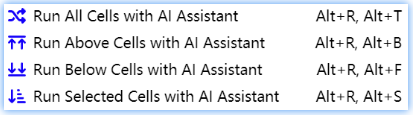

5. **程序文本和LLM文本交互**：markdown单元格和code单元格的source文本，都可以在当前python程序中直接按照`_refs["唯一id"]`形式引用，方便用户利用python和LLM之间做文本交互输入输出
   
6. **Info、Help按键和指令**：获得当前单元格xxxxxx字符串形式的唯一id以及从0开始计数的绝对id，当前单元格所要引用的id，@param的个性化参数等信息，其中点击时，当前单元格的唯一id引用将会拷贝到粘贴板中方便用户引用，跨notebook的请直接用python程序按照json数据读取.ipynb文件，从中找到唯一id所对应的单元格信息，详见**跨notebook引用单元格章节**
    
    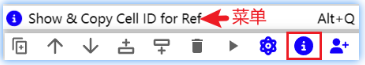

    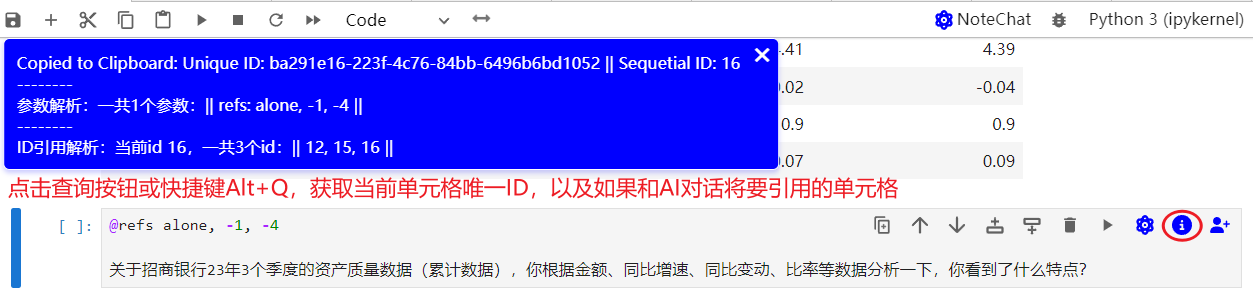


# 单个notebook级别参数设定

在notebook右上角找到`Property Inspector（齿轮图标）-> ADVANCED TOOLS -> Notebook metadata`，在其中加入或修改字段`"notechat":{"param":value}`并确认，从而达到覆盖settings参数并固定当前notebook参数保证复现的目的，注意这里的param不用加@，覆盖优先级为`user>assistant>notebook>settings`，如果cell中已经有@add_prompt则会覆盖notebook级别的add_prompt，可定义参数Json数据如下供参考，可以删除无必要放在notebook中的相应字段：

```json
{
    "prompt": "You are a helpful and warm-hearted assistant:) You have a good background knowledge in AI, STEM, finance, economics, statistics and related fields. Now you are helping the user to develop code, analyze data or write a report under a JupyterLab notebook environment (format: *.ipynb).",
    "add_prompt": "Use Chinese to respond.",
    "num_prev_cells": 3,
    "model": "gpt-3.5-turbo-1106",
    "vision_model": "gpt-4-vision-preview",
    "use_vision": true,
    "max_input": 59999,
    "max_output": 4096,
    "temperature": 0.5,
    "timeout": 200,
    "openai_api_key": "None"
}

```

**示例和操作步骤如下：**

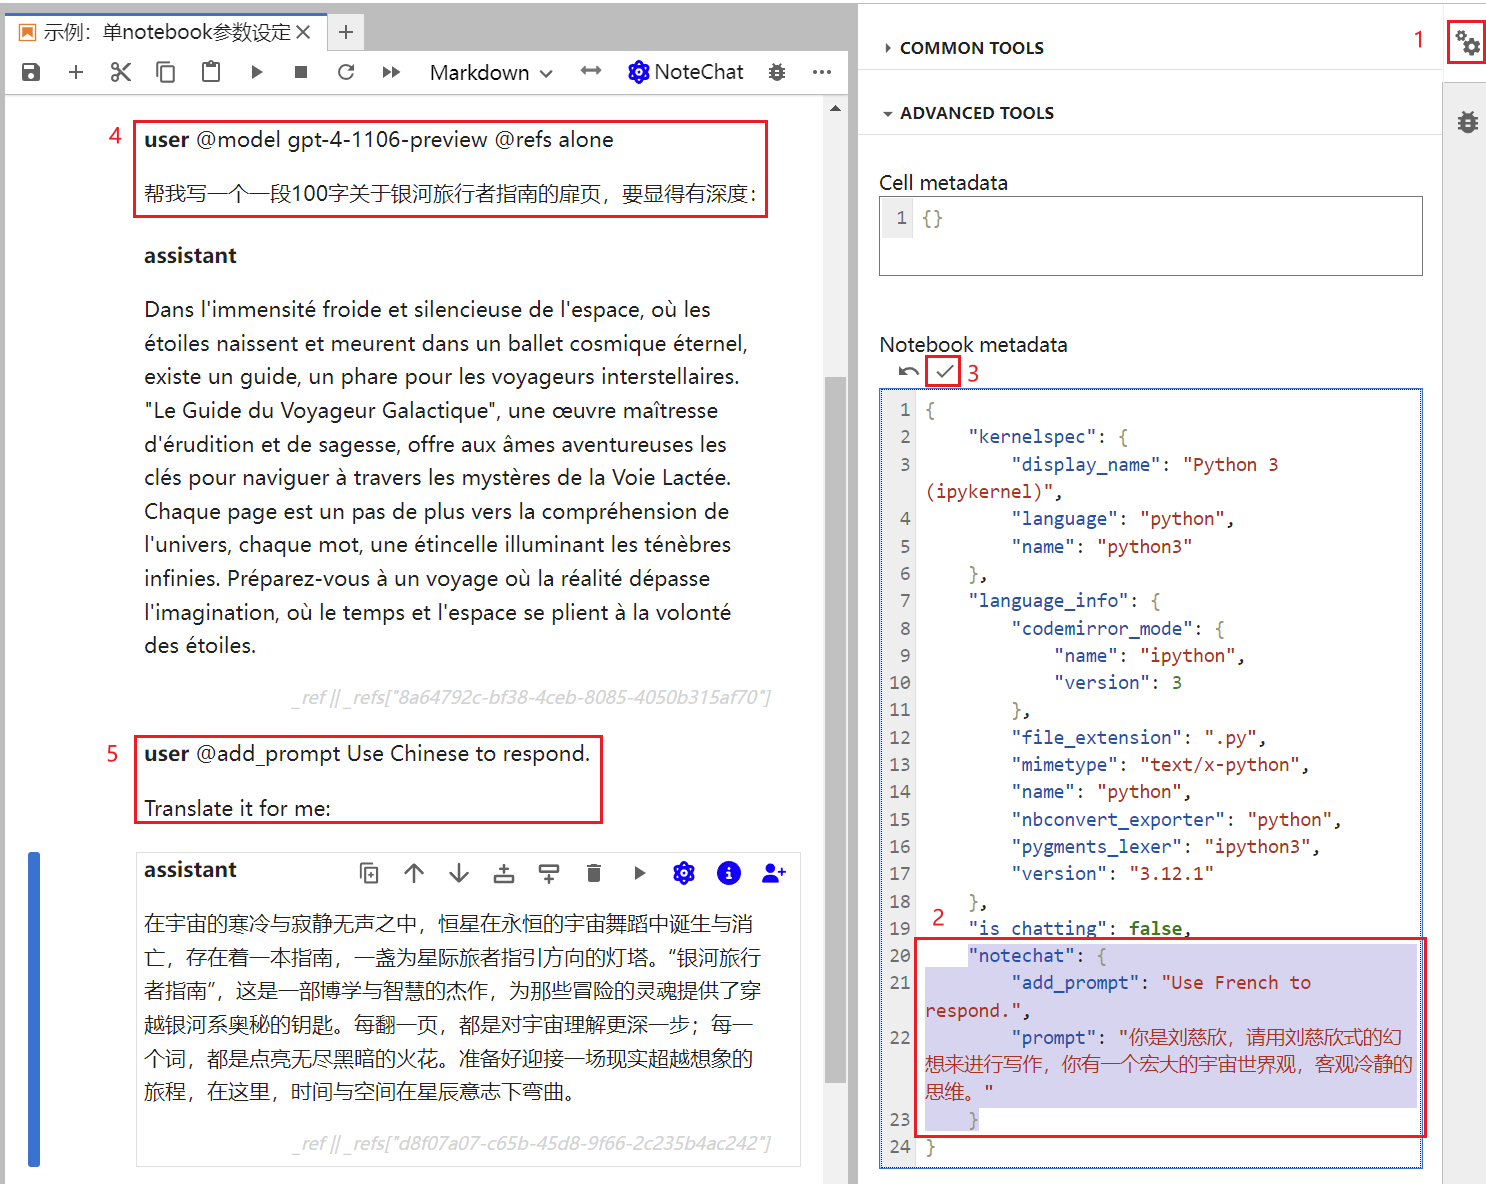

# 跨notebook引用单元格

In [12]:
import json

# 笔记本文件路径
notebook_path = '示例：学习、编程和表格.ipynb'

# 加载笔记本文件
with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
    notebook_content = json.load(notebook_file)

# 目标单元格的ID
target_cell_id = '753cd039-f1df-4035-a08c-672d93fa27e2'

# 初始化变量来存储结果
target_source = None
target_outputs = None

# 遍历笔记本中的所有单元格
for cell in notebook_content['cells']:
    # 检查单元格ID是否匹配
    if cell.get('id') == target_cell_id:
        # 获取source
        target_source = cell.get('source', [])
        # 获取outputs
        target_outputs = cell.get('outputs', [])
        break

# 检查是否找到目标单元格，并打印结果
if target_source is not None and target_outputs is not None:
    print("找到了目标单元格！")
    print("Source:")
    print('\n'.join(target_source))
    print("Outputs:")
    print(target_outputs)
else:
    print("未找到具有指定ID的单元格。")

找到了目标单元格！
Source:
import pandas as pd



# 创建一个简单的 DataFrame

df = pd.DataFrame({

    'a': [1, 2, 3],

    'b': [4, 5, 6],

    'c': [7, 8, 9]

})



# 将 DataFrame 转换为 Markdown 格式的字符串

markdown_table = df.to_markdown()



print(markdown_table)
Outputs:
[{'name': 'stdout', 'output_type': 'stream', 'text': ['|    |   a |   b |   c |\n', '|---:|----:|----:|----:|\n', '|  0 |   1 |   4 |   7 |\n', '|  1 |   2 |   5 |   8 |\n', '|  2 |   3 |   6 |   9 |\n']}]


# 常见示例

## 整理数据

**可以从pdf中把一些复制粘贴较为费事的数据拷贝出来，制作成表格**


In [ ]:
招商银行公告

2023Q3：
报告期内，本公司新生成不良贷款454.95亿元，同比减少6.74亿元；不良贷款生成率（年化） 1.03%，
同比下降0.10个百分点。其中，公司贷款不良生成额92.08亿元，同比减少42.74亿元，主要是房地产业
贷款不良生成额同比减少；零售贷款（不含信用卡）不良生成额65.69亿元，同比增加9.56亿元，信用
卡新生成不良贷款297.18亿元，同比增加26.44亿元，零售贷款不良生成同比增加， 主要是2022年末经
济运行疲弱带来的滞后影响，整体在可控范围内。
本公司继续积极处置不良资产，报告期内共处置不良贷款429.62亿元，其中，常规核销168.80亿元，
清收82.79亿元，不良资产证券化177.13亿元，通过抵债、转让、重组上迁、减免等其他方式处置0.90
亿元。
本公司坚持审慎、稳健的拨备计提政策，按照金融工具准则要求，以预期信用损失模型为基础，基于
客户的违约概率、违约损失率等风险量化参数，结合宏观前瞻性的调整，充分计提信用风险损失准备，
并不断夯实重点领域风险抵补能力。截至报告期末，本公司贷款损失准备余额2,672.50亿元，较上年
末增加138.37亿元；拨备覆盖率468.96%，较上年末上升1.53个百分点；贷款拨备率4.39%，较上年末
下降0.04个百分点。 2023年1-9月，本公司信用成本（年化） 0.90%，同比上升0.09个百分点。

2023H1:
报告期内，本公司新生成不良贷款305.09亿元，同比减少1.93亿元 ；不良贷款生成率（年化） 1.04%，同比下降
0.09个百分点。从业务大类看，公司贷款不良生成额56.93亿元，同比减少33.80亿元 ；零售贷款（不含信用卡）
不良生成额43.69亿元，同比增加7.88亿元 ；信用卡新生成不良贷款204.47亿元，同比增加23.99亿元。从地
区看，不良生成主要分布在长三角、环渤海地区及总行（信用卡贷款）；从行业看，不良生成主要集中在房地产
业 ；从客群看，不良生成多数为国标中型企业。
本公司持续夯实预期信用损失法实施基础，并始终坚持价值客户选择，优化资产组合配置，风险抵补充足，具备
较强的风险抵御能力。截至报告期末，本公司贷款损失准备余额2,636.18亿元，较上年末增加102.05亿元 ；拨
备覆盖率465.73%，较上年末下降1.70个百分点 ；贷款拨备率4.41%，较上年末下降0.02个百分点 ；报告期信
用成本（年化） 0.90%，同比上升0.07个百分点。
报告期内，本公司积极处置不良资产，运用多种途径化解风险资产，报告期内共处置不良贷款282.78亿元，其
中，常规核销110.51亿元，不良资产证券化113.76亿元，清收56.37亿元，通过抵债、转让、重组上迁、减免
等其他方式处置2.14亿元。

2023Q1
报告期内，本公司新生成不良贷款160.23亿元，同比增加5.87亿元；不良贷款生成率（年化） 1.09%，同比
下降0.07个百分点。其中，公司贷款不良生成额30.70亿元， 同比减少21.63亿元，主要是房地产业贷款不良
生成节奏同比有所放缓；零售贷款（不含信用卡）不良生成额24.67亿元，同比增加10.32亿元，信用卡新生
成不良贷款104.86亿元，同比增加17.18亿元，零售贷款不良生成同比增加，主要是2022年末经济表现相对
疲弱带来的滞后影响， 整体可控。
本公司继续积极处置不良资产，报告期内共处置不良贷款136.63亿元，其中，常规核销44.58亿元，清收28.02
亿元，不良资产证券化60.96亿元，通过抵债、转让、重组上迁、减免等其他方式处置3.07亿元。
本公司坚持审慎、稳健的拨备计提政策，按照金融工具准则要求，以预期信用损失模型为基础，基于客户
的违约概率、违约损失率等风险量化参数，结合宏观前瞻性的调整，充分计提信用风险损失准备，并不断
夯实重点领域风险抵补能力。截至报告期末，本公司贷款损失准备余额2,620.27亿元，较上年末增加86.14
亿元；拨备覆盖率463.19%，较上年末下降4.24个百分点；贷款拨备率4.39%，较上年末下降0.04个百分点。
2023年1-3月，本公司信用成本（年化） 1.04%，同比上升0.23个百分点， 主要是一季度贷款规模增加导致
贷款拨备支出增加。

In [ ]:
**user** @refs -1

帮我把上面的文本中的关于资产质量的各项披露数据整理成表格，横向是报告期从小到大，纵向是各项数据名称，导出为excel

**assistant**

首先，我们将提取的数据整理成一个Python字典，然后利用Pandas库将其转换为DataFrame，并最终导出为Excel文件。下面是整理数据并进行导出的代码：

```python
import pandas as pd

# 整理的数据
data = {
    "报告期": ["2023Q1", "2023H1", "2023Q3"],
    "新生成不良贷款(亿元)": [160.23, 305.09, 454.95],
    "新生成不良贷款同比增减(亿元)": [5.87, -1.93, -6.74],
    "不良贷款生成率(年化)": [1.09, 1.04, 1.03],
    "不良贷款生成率同比变动(个百分点)": [-0.07, -0.09, -0.10],
    "公司贷款不良生成额(亿元)": [30.70, 56.93, 92.08],
    "公司贷款不良生成额同比增减(亿元)": [-21.63, -33.80, -42.74],
    "零售贷款不良生成额(亿元)": [24.67, 43.69, 65.69],
    "零售贷款不良生成额同比增减(亿元)": [10.32, 7.88, 9.56],
    "信用卡新生成不良贷款(亿元)": [104.86, 204.47, 297.18],
    "信用卡新生成不良贷款同比增减(亿元)": [17.18, 23.99, 26.44],
    "处置不良贷款(亿元)": [136.63, 282.78, 429.62],
    "处置不良贷款方式": ["核销、清收、证券化、其他", "核销、证券化、清收、其他", "核销、清收、证券化、其他"],
    "贷款损失准备余额(亿元)": [2620.27, 2636.18, 2672.50],
    "贷款损失准备余额同比增减(亿元)": [86.14, 102.05, 138.37],
    "拨备覆盖率(%)": [463.19, 465.73, 468.96],
    "拨备覆盖率同比变动(个百分点)": [-4.24, -1.70, 1.53],
    "贷款拨备率(%)": [4.39, 4.41, 4.39],
    "贷款拨备率同比变动(个百分点)": [-0.04, -0.02, -0.04],
    "信用成本(年化)(%)": [1.04, 0.90, 0.90],
    "信用成本同比变动(个百分点)": [0.23, 0.07, 0.09]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置报告期为索引
df.set_index("报告期", inplace=True)

# 按报告期排序
df.sort_index(inplace=True)

# 导出为Excel文件
excel_filename = "招商银行资产质量数据.xlsx"
df.to_excel(excel_filename)

print(f"数据已成功导出到 {excel_filename}")
```

请注意，由于我作为一个AI助手不能直接在您的文件系统上执行代码，您需要将上述代码复制到您的JupyterLab环境中并执行，以生成和保存Excel文件。如果您遇到任何问题，请随时向我咨询。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["1d550e8d-d895-4ce2-bb2d-116a139e25d2"]</div>

In [11]:
import pandas as pd

# 整理的数据
data = {
    "报告期": ["2023Q1", "2023H1", "2023Q3"],
    "新生成不良贷款(亿元)": [160.23, 305.09, 454.95],
    "新生成不良贷款同比增减(亿元)": [5.87, -1.93, -6.74],
    "不良贷款生成率(年化)": [1.09, 1.04, 1.03],
    "不良贷款生成率同比变动(个百分点)": [-0.07, -0.09, -0.10],
    "公司贷款不良生成额(亿元)": [30.70, 56.93, 92.08],
    "公司贷款不良生成额同比增减(亿元)": [-21.63, -33.80, -42.74],
    "零售贷款不良生成额(亿元)": [24.67, 43.69, 65.69],
    "零售贷款不良生成额同比增减(亿元)": [10.32, 7.88, 9.56],
    "信用卡新生成不良贷款(亿元)": [104.86, 204.47, 297.18],
    "信用卡新生成不良贷款同比增减(亿元)": [17.18, 23.99, 26.44],
    "处置不良贷款(亿元)": [136.63, 282.78, 429.62],
    "处置不良贷款方式": ["核销、清收、证券化、其他", "核销、证券化、清收、其他", "核销、清收、证券化、其他"],
    "贷款损失准备余额(亿元)": [2620.27, 2636.18, 2672.50],
    "贷款损失准备余额同比增减(亿元)": [86.14, 102.05, 138.37],
    "拨备覆盖率(%)": [463.19, 465.73, 468.96],
    "拨备覆盖率同比变动(个百分点)": [-4.24, -1.70, 1.53],
    "贷款拨备率(%)": [4.39, 4.41, 4.39],
    "贷款拨备率同比变动(个百分点)": [-0.04, -0.02, -0.04],
    "信用成本(年化)(%)": [1.04, 0.90, 0.90],
    "信用成本同比变动(个百分点)": [0.23, 0.07, 0.09]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置报告期为索引
df.set_index("报告期", inplace=True)

# 按报告期排序
print(df.T.to_markdown())
df.T

|                                    | 2023Q1                   | 2023H1                   | 2023Q3                   |
|:-----------------------------------|:-------------------------|:-------------------------|:-------------------------|
| 新生成不良贷款(亿元)               | 160.23                   | 305.09                   | 454.95                   |
| 新生成不良贷款同比增减(亿元)       | 5.87                     | -1.93                    | -6.74                    |
| 不良贷款生成率(年化)               | 1.09                     | 1.04                     | 1.03                     |
| 不良贷款生成率同比变动(个百分点)   | -0.07                    | -0.09                    | -0.1                     |
| 公司贷款不良生成额(亿元)           | 30.7                     | 56.93                    | 92.08                    |
| 公司贷款不良生成额同比增减(亿元)   | -21.63                   | -33.8                    | -42.74                   |
| 零售贷款不良生成额(亿元)           | 24.67                    | 43.69                    | 65.69                    |
| 零

报告期,2023Q1,2023H1,2023Q3
新生成不良贷款(亿元),160.23,305.09,454.95
新生成不良贷款同比增减(亿元),5.87,-1.93,-6.74
不良贷款生成率(年化),1.09,1.04,1.03
不良贷款生成率同比变动(个百分点),-0.07,-0.09,-0.1
公司贷款不良生成额(亿元),30.7,56.93,92.08
公司贷款不良生成额同比增减(亿元),-21.63,-33.8,-42.74
零售贷款不良生成额(亿元),24.67,43.69,65.69
零售贷款不良生成额同比增减(亿元),10.32,7.88,9.56
信用卡新生成不良贷款(亿元),104.86,204.47,297.18
信用卡新生成不良贷款同比增减(亿元),17.18,23.99,26.44


In [ ]:
**user** @refs alone, -1, -4

关于招商银行23年3个季度的资产质量数据（累计数据），你根据金额、同比增速、同比变动、比率等数据分析一下，你看到了什么特点？

**assistant**

通过分析招商银行2023年前三个季度的资产质量数据，我们可以观察到以下特点：

1. **新生成不良贷款总额的变化趋势**：
   - 2023Q1：新生成不良贷款金额为160.23亿元，同比增加了5.87亿元。
   - 2023H1：新生成不良贷款金额为305.09亿元，同比减少了1.93亿元。
   - 2023Q3：新生成不良贷款金额为454.95亿元，同比减少了6.74亿元。
   这表明在整个年度中，新生成的不良贷款总额在第一季度相比去年同期有所增加，但随后两个季度显示出同比减少的趋势，说明银行在不良贷款控制方面取得了一定的成效。

2. **不良贷款生成率的变化**：
   - 不良贷款生成率（年化）逐季下降，从2023Q1的1.09%降至2023Q3的1.03%，同比分别下降了0.07、0.09和0.10个百分点。这一连续的下降趋势表明银行对贷款的质量控制在逐渐加强。

3. **公司贷款与零售贷款不良生成额的对比**：
   - 公司贷款不良生成额呈现持续下降趋势，从2023Q1的30.70亿元下降至2023Q3的92.08亿元，同比减少额分别为21.63亿元、33.80亿元和42.74亿元。
   - 零售贷款（不含信用卡）不良生成额则呈现增长趋势，从2023Q1的24.67亿元增加至2023Q3的65.69亿元，同比增加额分别为10.32亿元、7.88亿元和9.56亿元。
   这可能反映出公司贷款的风险管理相对更为严格，而零售贷款（尤其是信用卡贷款）的风险管控需要进一步加强。

4. **信用卡新生成不良贷款的增长**：
   - 信用卡新生成不良贷款持续增加，从2023Q1的104.86亿元增加至2023Q3的297.18亿元，同比增加额分别为17.18亿元、23.99亿元和26.44亿元。
   这一增长可能与消费者的信用行为有关，以及可能的宏观经济因素影响。

5. **不良贷款处置情况**：
   - 银行在不同季度通过核销、清收、证券化等多种方式积极处置不良贷款，处置金额从2023Q1的136.63亿元增加至2023Q3的429.62亿元，显示出银行在积极减少不良资产的积极态度。

6. **贷款损失准备和覆盖率**：
   - 贷款损失准备余额逐季递增，从2620.27亿元增加至2672.50亿元，同比增加额分别为86.14亿元、102.05亿元和138.37亿元。
   - 拨备覆盖率和贷款拨备率在小幅波动中整体保持稳定，拨备覆盖率从463.19%上升至468.96%，显示出银行对未来潜在信用风险的预防措施较为充分。

7. **信用成本的变化**：
   - 信用成本（年化）在2023Q1为1.04%，之后两个季度稳定在0.90%，同比变动分别为0.23、0.07和0.09个百分点。这意味着银行在信用风险管理上的成本有所波动，但整体保持在相对稳定的水平。

总体来看，招商银行在2023年的前三个季度中，虽然面临信用卡不良贷款的增长压力，但整体不良贷款生成率呈下降趋势，银行积极处置不良贷款，并持续增强贷款损失准备，显示出对未来风险的审慎态度和较强的风险抵御能力。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["f99c2f08-b7e1-44a9-b078-bbc68ccfe0b7"]</div>

## 生成摘要

**相较excel的hard coding生成摘要，可以利用GPT的能力，仅提供较为灵活的模版，就能生成普适性较强的摘要或总结**

You are a professional macro analyst. Your task is to extract brief text and number information from the raw text and fill in <> in the TEPMPLATE.

TEPMPLATE:

```
生产<>，<>月工业增加值同比增速为<>、相比前值<>，4年平均增速为<>、相比前值<>；
投资<>，固定资产投资完成额测算当月值同比增速为<>、相比前值<>，当月值4年平均增速为<>、相比前值<>；
投资的结构上，制造业投资<>，测算当月值同比增速为<>、相比前值<>，当月值4年平均增速为<>、相比前值<>；
基建投资<>，测算当月值同比增速为<>、相比前值<>，当月值4年平均增速为<>、相比前值<>；
地产投资<>，测算当月值同比增速为<>、相比前值<>，当月值4年平均增速为<>、相比前值<>；
商品房销售<>，测算当月面积同比增速为<>、相比前值<>，当月值4年平均增速为<>、相比前值<>；
新开工<>，测算当月面积同比增速为<>、相比前值<>，当月值4年平均增速为<>、相比前值<>；
竣工<>，测算当月面积同比增速为<>、相比前值<>，当月值4年平均增速为<>、相比前值<>；
消费<>，社零当月同比增速为<>、相比前值<>，4年平均增速为<>、相比前值<>；
出口<>，以美元计价的出口金额同比增速为<>、相比前值<>，4年平均增速为<>、相比前值<>；
就业<>，城镇调查失业率为<>、相比前值<>；
通胀<>，CPI同比增速为<>、预期<>、前值<>、环比<>，PPI同比增速为<>、预期<>、前值<>、环比<>。
```

fill in examples:

- 同比增速为<为x.x%>
- 相比前值<x.x%上升x.xpct/下降x.xpct/持平>
- 环比<上升x.x%/下降x.x%/持平>

...

**user** @refs -1

现在我们开始这个任务：

Raw text:
```
● 生产方面：景气度略有回落，官方亦表示制造业订单不足的情况比较突出，发电量和粗钢有所回落，水泥降幅略有收窄，或反映灾后重建等万亿国债投向相关基建景气度即将提升，工业品出口可能较整体出口而言相对强势，多数细分行业较上月有所回落，中游汽车和电气机械保持强势；
1）工业增加值同比增速因去年基数略低小幅提升、略超预期，但2年平均和4年平均增速较前值均小幅下行，工业景气度略有收窄，叠加服务业的GDP拟合增速及2年平均增速方向和生产类似，10月整体经济景气度小幅收窄：当月同比增速为4.6%、预期4.3%、相比前值4.5%上升0.1pct、前值上升0.0pct，4年平均增速为5.0%、相比前值5.2%下降0.2pct、前值上升0.3pct；工增季调环比增速为0.4%、相比前值0.4%上升0.0pct、前值下降0.1pct；采用工业增加值增速和服务业生产指数增速拟合的GDP当月增速约为5.6%、相比前值5.3%上升0.3pct，两年平均4.6%、前值4.9%、较前值有所下行；

● 投资方面：边际继续走弱、不及预期，主要受到地产投资持续低迷、降幅继续扩大的拖累，地产需求及开工竣工均明显走弱，非地产方面可能受前期季末冲量透支的影响，也有风险偏好弱、投资意愿下降的因素，制造业投资和基建投资有所回落；
1）固定资产投资完成额边际走弱、不及预期，制造业、基建、地产全线拖累：累计值同比增速为2.9%、预期3.1%、前值3.1%，测算10月当月值同比增速为1.3%、相比前值2.5%下降1.1pct、前值上升0.5pct，当月值4年平均增速为3.3%、相比前值3.6%下降0.4pct、前值下降0.6pct；
2）制造业投资回落，可能受前期季末冲量透支的影响，也有风险偏好弱、投资意愿有所下降的因素：累计值同比增速为6.2%、前值6.2%，测算10月当月值同比增速为6.2%、相比前值7.9%下降1.7pct、前值上升0.8pct，当月值4年平均增速为6.7%、相比前值7.8%下降1.1pct、前值上升0.4pct；
3）基建投资小幅降速，万亿国债增发落地投入使用后将带动防灾减灾、灾后重建等基建项目投资加速增长：累计值同比增速为8.3%、前值8.6%，测算10月当月值同比增速为5.6%、相比前值6.8%下降1.2pct、前值上升0.6pct，当月值4年平均增速为5.0%、相比前值5.6%下降0.6pct、前值上升0.4pct；基建投资（不含电力）累计值同比增速为5.9%、前值6.2%，测算10月当月值同比增速为3.7%、相比前值5.0%下降1.3pct、前值上升1.0pct，当月值4年平均增速为3.7%、相比前值2.8%上升0.8pct、前值下降0.7pct；
4）地产投资仍在走弱，10月新房销售不及节前，资金来源方面偏弱、定金差而贷款略收窄也反应了主要问题还在需求端，新开工和竣工均显著走弱：累计值同比增速为-9.3%、前值-9.1%，测算10月当月值同比增速为-11.3%、相比前值-11.2%下降0.1pct、前值下降0.3pct，当月值4年平均增速为-5.7%、相比前值-4.2%下降1.5pct、前值下降0.7pct；
■ 商品房销售再度走弱，销售额单月降幅收窄主要与上年基数偏低有关，10月新房销售不及节前，一线平稳、二三线更弱，政策刺激需求回补逐渐消退：累计值同比增速为-7.8%、前值-7.5%，测算10月当月值同比增速为-10.9%、相比前值-10.1%下降0.8pct、前值上升1.8pct，当月值4年平均增速为-11.4%、相比前值-8.6%下降2.8pct、前值上升1.4pct；商品房销售额，累计值同比增速为-4.9%、前值-4.6%，测算10月当月值同比增速为-8.1%、相比前值-13.5%上升5.4pct、前值上升2.6pct，当月值4年平均增速为-9.6%、相比前值-7.6%下降2.0pct、前值上升1.2pct；
■ 房地产开发资金来源方面，4年平均增速看定金和预收恶化，而地产公司贷款和发债则有所收窄，反映了目前市场地产差主要来自需求，而资金供给意愿相较需求更好一点：累计值同比增速为-13.8%、前值-13.5%，测算10月当月值同比增速为-16.9%、相比前值-18.0%上升1.1pct、前值上升7.3pct，当月值4年平均增速为-10.8%、相比前值-10.0%下降0.8pct、前值上升0.2pct；
■ 新开工面积降幅显著扩大：累计值同比增速为-23.2%、前值-23.4%，测算10月当月值同比增速为-21.1%、相比前值-14.6%下降6.5pct、前值上升8.9pct，当月值4年平均增速为-22.7%、相比前值-20.3%下降2.4pct、前值上升2.5pct；
■ 竣工面积亦有明显回落：累计值同比增速为19.0%、前值19.8%，测算10月当月值同比增速为13.3%、相比前值25.4%下降12.1pct、前值上升14.9pct，当月值4年平均增速为-3.5%、相比前值-0.9%下降2.6pct、前值下降6.6pct；

● 消费方面景气度维持在前值附近、好于预期，去年基数偏低，环比基本持平，但餐饮等社交经济显著回落，叠加高频数据及双十一数据不及预期，未来消费可能回落：社零当月同比增速为7.6%、预期7.3%、相比前值5.5%上升2.1pct、前值上升0.9pct，4年平均增速为4.0%、相比前值3.9%上升0.1pct、前值上升0.7pct；

● 出口相比前值有所回落，低于预期，主要因外需偏弱，量价均有拖累，中低端产品拖累居多，10月PMI新出口订单也有所走弱，10月西方国家特别是美国制造业和服务业PMI有较为明显的走弱，外需展望偏弱：10月美元计价的出口金额当月同比增速为-6.4%、预期-3.1%、相比前值-6.2%下降0.2pct（作为参考，前值上升2.5pct），4年平均增速为6.6%、相比前值8.2%下降1.6pct（作为参考，前值上升0.9pct）；当月出口金额为2748亿、同比减少193亿，前值2991亿、同比减少197亿，累计值27920亿、同比减少1739亿；

● 就业形势总体稳定、符合预期，好于季节性规律，城镇失业率维持低位、与上月持平，结构上看，新增就业人数显著弱于季节性，预计青年就业继续承压，大城市城镇调查失业率略有下降，本地人口失业率继续下降至年内新低，但10月PMI从业人员指数来看就业形势较差，特别是服务业就业显著走弱：10月城镇调查失业率为5.0%、相比前值5.0%上升0.0pct、前值下降0.2pct；9月城镇新增就业人数为98万人、同比少增5万人，前值118万人、同比多增3万人；本地人口失业率为5.0%、相比前值5.1%下降0.1pct、前值下降0.2pct；外来人口失业率为4.9%、相比前值4.9%上升0.0pct、前值上升0.1pct；

● 通胀较弱：中国10月CPI同比下降0.2%，预期降0.1%，前值持平，环比下降0.1%；中国10月PPI同比下降2.6%，预期降2.6%，前值降2.5%，环比由上月上涨0.4%转为持平。
```

Filled text:

**assistant**

```
生产方面，10月工业增加值同比增速为4.6%、相比前值4.5%上升0.1pct，4年平均增速为5.0%、相比前值5.2%下降0.2pct；
投资边际继续走弱，固定资产投资完成额测算当月值同比增速为1.3%、相比前值2.5%下降1.1pct，当月值4年平均增速为3.3%、相比前值3.6%下降0.4pct；
投资的结构上，制造业投资回落，测算当月值同比增速为6.2%、相比前值7.9%下降1.7pct，当月值4年平均增速为6.7%、相比前值7.8%下降1.1pct；
基建投资小幅降速，测算当月值同比增速为5.6%、相比前值6.8%下降1.2pct，当月值4年平均增速为5.0%、相比前值5.6%下降0.6pct；
地产投资仍在走弱，测算当月值同比增速为-11.3%、相比前值-11.2%下降0.1pct，当月值4年平均增速为-5.7%、相比前值-4.2%下降1.5pct；
商品房销售再度走弱，测算当月面积同比增速为-10.9%、相比前值-10.1%下降0.8pct，当月值4年平均增速为-11.4%、相比前值-8.6%下降2.8pct；
新开工面积降幅显著扩大，测算当月面积同比增速为-21.1%、相比前值-14.6%下降6.5pct，当月值4年平均增速为-22.7%、相比前值-20.3%下降2.4pct；
竣工面积亦有明显回落，测算当月面积同比增速为13.3%、相比前值25.4%下降12.1pct，当月值4年平均增速为-3.5%、相比前值-0.9%下降2.6pct；
消费方面景气度维持在前值附近，社零当月同比增速为7.6%、相比前值5.5%上升2.1pct，4年平均增速为4.0%、相比前值3.9%上升0.1pct；
出口相比前值有所回落，以美元计价的出口金额同比增速为-6.4%、相比前值-6.2%下降0.2pct，4年平均增速为6.6%、相比前值8.2%下降1.6pct；
就业形势总体稳定，城镇调查失业率为5.0%、相比前值5.0%持平；
通胀较弱，CPI同比增速为-0.2%、预期-0.1%、前值0.0%、环比下降0.1%，PPI同比增速为-2.6%、预期-2.6%、前值-2.5%、环比持平。
```

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["9bb4435d-5f15-4d6d-885d-79029f394843"]</div>

## 图像识别和理解

**可以把一些较为费解的图表，特别是英文的，交给GPT来解读**

**user** @refs alone

帮我解释一下这个图表讲了什么？

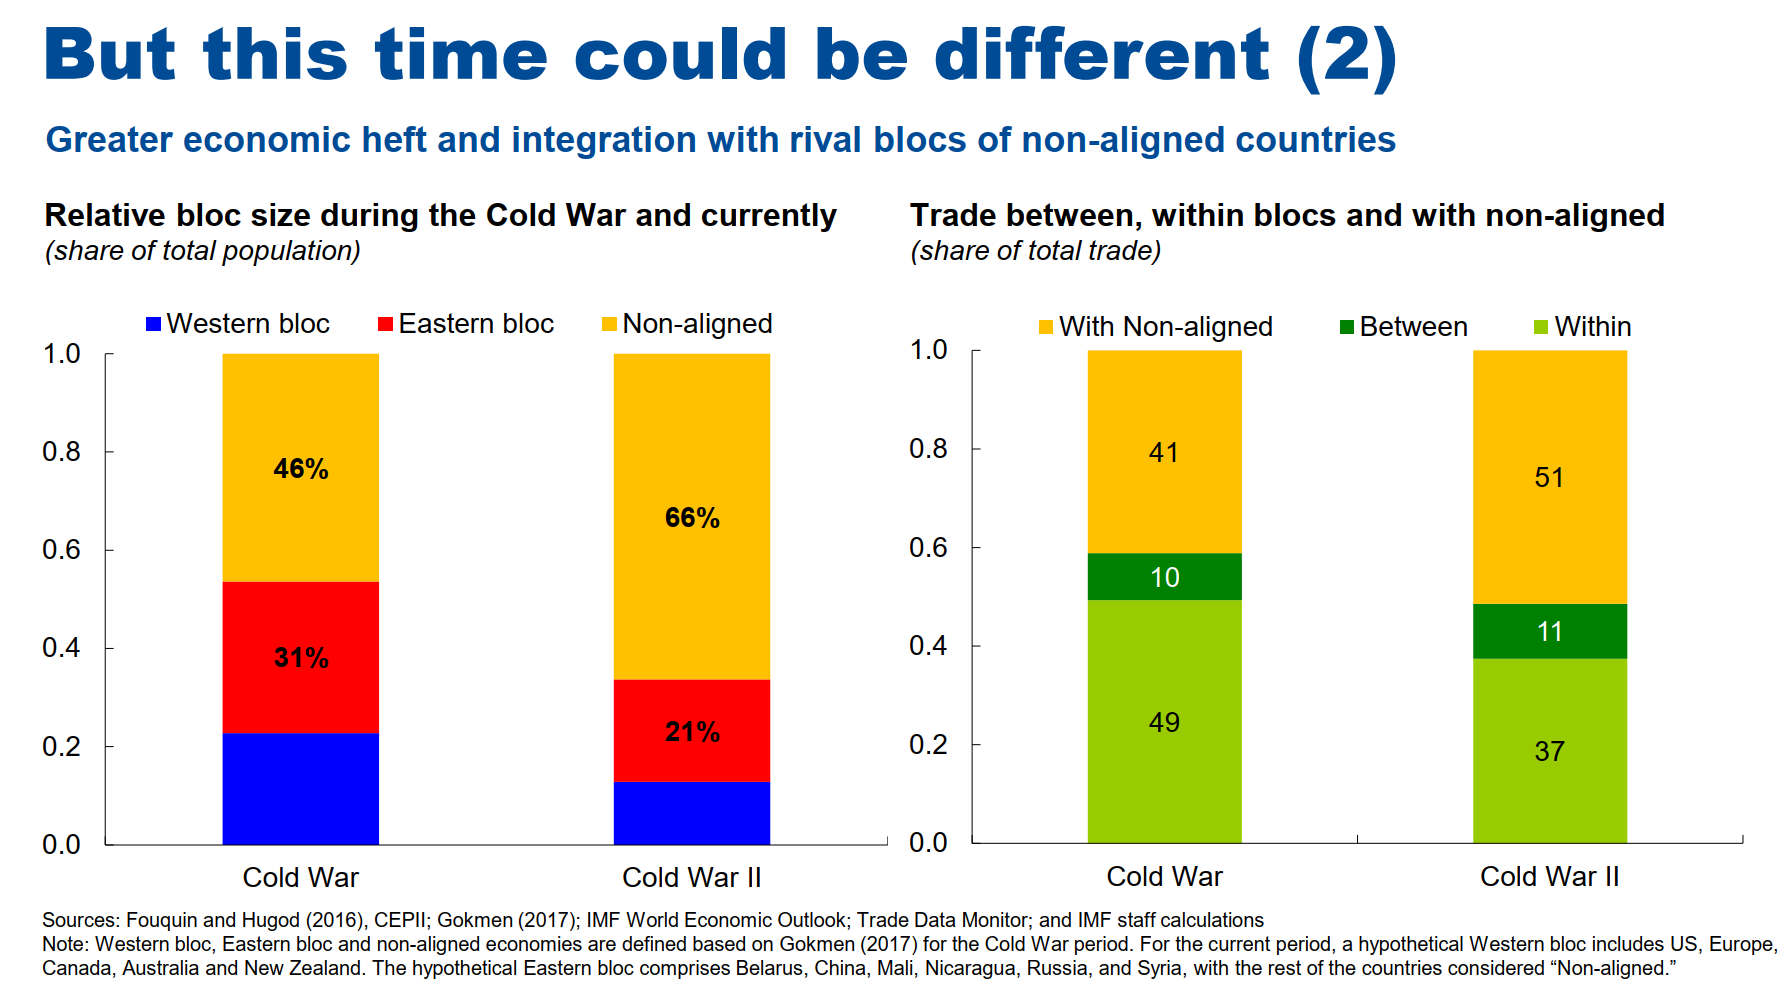

**assistant**

这个图表比较了冷战时期和当前所谓的“冷战II”时期的经济集团的相对规模和贸易模式。图表分为两部分，左侧是经济集团的相对规模，右侧是经济集团间的贸易情况。

左侧图表显示的是西方集团（蓝色）、东方集团（红色）和不结盟国家（黄色）在冷战时期和当前的人口占比。在冷战时期，西方集团约占总人口的46%，东方集团约占31%，不结盟国家约占23%。在“冷战II”时期，不结盟国家的比例上升到了66%，而西方集团和东方集团的比例分别下降到了21%和13%。

右侧图表显示的是在冷战和“冷战II”时期，不同集团之间（绿色）、集团内部（黄色）以及与不结盟国家之间（橙色）的贸易占总贸易的比例。在冷战时期，集团内部的贸易占比最大，为51%，其次是与不结盟国家的贸易，为41%，不同集团之间的贸易最少，为10%。在“冷战II”时期，集团内部贸易的比例下降到了37%，与不结盟国家的贸易比例上升到了49%，不同集团之间的贸易比例略有增加，为11%。

图表的标题“但这次可能不同（But this time could be different）”表明了当前的全球政治和经济格局与冷战时期相比可能有显著的不同，尤其是在经济集团的规模和贸易模式方面。不结盟国家在当前的全球经济中扮演了更加重要的角色，而集团间的经济联系也有所变化。

图表下方的注释说明了西方集团、东方集团和不结盟国家的定义，并列出了一些属于假设的东方集团的国家，包括白俄罗斯、中国、马里、尼加拉瓜、俄罗斯和叙利亚。同时指出，其他国家被认为是“不结盟”的。图表数据来源包括多个研究机构和国际组织的报告和数据库。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["09a5cec0-1fcd-438e-ba01-df5eb4b164e0"]</div>

## 学习新知识

**一般来说先列提纲，然后后续的对话引用提纲，一个知识点一个知识点学习**

**user** @refs alone

我想学习一下有关于GLP-1减肥药有关的内容，能帮我介绍一下减肥药的原理、类型、近几年的进展等内容吗，先帮我列一个提纲

**assistant**

当然可以。下面是有关GLP-1（胰高血糖素样肽-1）减肥药的一个基本提纲，包括了原理、类型以及近年来的进展。

### GLP-1减肥药提纲

#### 1. 引言
   - 肥胖症的定义和流行病学
   - 肥胖症的健康风险

#### 2. 减肥药的基本原理
   - 肥胖症的治疗概览
   - 非药物治疗：饮食、运动和行为疗法
   - 药物治疗的作用和机制
   - 药物治疗的目标和效果评估

#### 3. GLP-1的生物学作用
   - GLP-1的生物合成和分泌
   - GLP-1在体内的作用机制
   - GLP-1对食欲和饱腹感的调节
   - GLP-1对胰岛β细胞功能的影响

#### 4. GLP-1类似物的类型和药理学
   - 短效GLP-1类似物
   - 长效GLP-1类似物
   - GLP-1类似物的药代动力学和药效学

#### 5. GLP-1类似物在减肥治疗中的应用
   - GLP-1类似物的减肥效果
   - 临床试验结果
   - 适应症和禁忌症
   - 副作用和安全性问题

#### 6. 近几年的进展与创新
   - 新一代GLP-1类似物的研发
   - GLP-1与其他药物的联合治疗
   - 针对不同肥胖类型的个性化治疗策略
   - 市场趋势和未来预测

#### 7. 社会经济影响
   - 减肥药的经济负担
   - 医疗保险覆盖和减肥药的可及性
   - 减肥药对公共卫生的长远影响

#### 8. 结论
   - GLP-1类似物在当前减肥药市场中的地位
   - 持续研究的重要性和未来方向

#### 9. 参考文献
   - 关键的临床试验
   - 综述性文章
   - 最新的研究进展

这个提纲可以作为你学习GLP-1减肥药相关内容的大纲。如果需要更详细的资料，可以根据这个提纲进行深入研究，并查阅相关的临床试验报告、医学杂志和科学研究论文。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["c9df9c65-77ab-4bb8-b3d9-cb3163042a29"]</div>

**user** @refs alone，c9df9c65-77ab-4bb8-b3d9-cb3163042a29

请为我介绍一下第三点：

**assistant**

### 3. GLP-1的生物学作用

GLP-1（胰高血糖素样肽-1）是一种在体内具有多种生物学作用的肽类激素。以下是GLP-1的一些主要功能和作用机制：

#### 3.1 GLP-1的生物合成和分泌
- GLP-1主要由肠道的L细胞在食物摄入后分泌。
- 它是从前体分子前胰高血糖素（proglucagon）经过特定酶切割产生的。
- GLP-1的分泌受到食物成分，特别是碳水化合物和脂肪的刺激。

#### 3.2 GLP-1在体内的作用机制
- GLP-1通过与特定的GLP-1受体（GLP-1R）结合来发挥作用，这些受体主要表达在胰岛细胞和大脑中。
- 在胰腺，GLP-1刺激胰岛β细胞分泌胰岛素，这是在血糖水平升高时发生的，从而帮助降低血糖。
- 同时，GLP-1抑制胰岛α细胞分泌胰高血糖素（glucagon），进一步有助于降低血糖水平。

#### 3.3 GLP-1对食欲和饱腹感的调节
- GLP-1在大脑的作用包括调节食欲和饱腹感。它可以减少摄食量和食物的摄入，这是通过促进饱腹感和延迟胃排空来实现的。
- GLP-1还能影响中枢神经系统中的饥饿和饱腹中心，从而减少食欲。

#### 3.4 GLP-1对胰岛β细胞功能的影响
- GLP-1不仅刺激胰岛素的分泌，还参与胰岛β细胞的生长和增殖。
- 它有助于维持胰岛β细胞的功能和质量，这对于2型糖尿病患者来说尤其重要，因为这种疾病通常与胰岛β细胞功能受损有关。

GLP-1的这些生物学作用使其成为治疗2型糖尿病的有力候选药物，因为它不仅可以帮助控制血糖，还可以通过调节食欲和饱腹感来帮助控制体重。这些特性也是GLP-1类似物在减肥治疗中应用的基础。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["67b8ff94-8de0-4640-9ee2-fdf37e774286"]</div>

**user** @refs alone，c9df9c65-77ab-4bb8-b3d9-cb3163042a29

请为我详细介绍一下第6点近几年的进展与创新：

**assistant**

### 近几年的进展与创新

#### 新一代GLP-1类似物的研发
- **更长效的类似物**：为了减少注射频率，提高患者依从性，研发了作用时间更长的GLP-1类似物。例如，semaglutide可以每周注射一次，而其他一些正在开发中的类似物甚至可能实现每月一次的注射。
- **口服制剂**：尽管大多数GLP-1类似物需要通过注射给药，但最近有了口服GLP-1类似物的研发成功，如口服semaglutide，这是一个重大突破，因为它大大提高了患者的依从性。

#### GLP-1与其他药物的联合治疗
- **联合使用**：研究表明，GLP-1类似物与其他药物如SGLT2抑制剂（钠-葡萄糖共转运蛋白2抑制剂）联合使用可能会带来更好的减重效果和心血管健康益处。
- **多重激动剂**：为了提高减肥效果，正在研发能同时激活GLP-1受体和其他肽类受体（如胰岛素增敏剂）的多重激动剂。

#### 针对不同肥胖类型的个性化治疗策略
- **基因定制治疗**：了解个体基因差异对GLP-1类似物反应的影响，有助于开发个性化治疗方案。
- **肥胖的亚型**：不同的肥胖亚型可能对治疗反应不同，研究人员正在探索如何根据肥胖的亚型来优化GLP-1类似物的使用。

#### 市场趋势和未来预测
- **扩大适应症**：随着对GLP-1类似物在减重以外的潜在益处（如对心脏病和糖尿病的益处）的认识增加，这些药物的适应症可能会扩大。
- **经济性和可及性**：随着竞争的增加和专利的到期，新一代GLP-1类似物可能会变得更经济、更易于患者获取。

这些进展不仅显示了医药领域在治疗肥胖症方面的创新，而且也反映了对患者依从性、治疗效果和整体健康管理的综合考虑。未来的研究将继续探索这些药物的最佳使用方法，以及如何将它们更好地整合到肥胖症的综合治疗中。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["86a9b009-cc56-4db2-adcc-b26e9a7fa425"]</div>

## 辅助编程

**user** @model gpt-4-1106-preview @refs alone

我如何将当前目录下的`notechat-test@model.ipynb`用json方式加载，并遍历其中的cell，获得其中的id为753cd039-f1df-4035-a08c-672d93fa27e2的单元格的source和outputs，帮我写这段python代码：

**assistant**

要加载Jupyter笔记本并遍历其中的单元格，你可以使用Python的`json`模块。以下是一段Python代码，它将打开指定的`.ipynb`文件，解析JSON内容，然后遍历所有单元格以找到具有指定ID的单元格，并提取其`source`和`outputs`。

```python
import json

# 笔记本文件路径
notebook_path = 'notechat-test@model.ipynb'

# 加载笔记本文件
with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
    notebook_content = json.load(notebook_file)

# 目标单元格的ID
target_cell_id = '753cd039-f1df-4035-a08c-672d93fa27e2'

# 初始化变量来存储结果
target_source = None
target_outputs = None

# 遍历笔记本中的所有单元格
for cell in notebook_content['cells']:
    # 检查单元格ID是否匹配
```

<span style="color:red;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# 注意这里GPT给出的答案在这里有个bug：cell直接get('id')，而不用get metadata</span>

```python
    if cell.get('metadata', {}).get('id') == target_cell_id:
        # 获取source
        target_source = cell.get('source', [])
        # 获取outputs
        target_outputs = cell.get('outputs', [])
        break

# 检查是否找到目标单元格，并打印结果
if target_source is not None and target_outputs is not None:
    print("找到了目标单元格！")
    print("Source:")
    print(target_source)
    print("Outputs:")
    print(target_outputs)
else:
    print("未找到具有指定ID的单元格。")
```

这段代码首先打开指定的`.ipynb`文件，并使用`json.load()`函数将其内容加载为Python字典。然后，它遍历笔记本中的所有单元格，检查每个单元格的元数据中是否有匹配的ID。如果找到匹配的单元格，它将提取该单元格的`source`和`outputs`。如果没有找到，它将打印一条消息说明未找到具有指定ID的单元格。

请注意，这段代码假设单元格的ID存储在单元格元数据的`id`字段中。如果你的笔记本使用不同的结构来存储单元格ID，你可能需要调整代码以匹配你的笔记本的结构。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["89d446aa-76d4-4f99-bbea-706420444b18"]</div>

**user** @model gpt-4-1106-preview @refs alone

html中如何在文字前增加空格？

**assistant**

在HTML中，连续的空格默认情况下会被浏览器压缩成一个空格。如果你想在文字前增加空格，你可以使用以下几种方法：

1. HTML实体 `&nbsp;`：
   HTML中的 `&nbsp;` 实体代表一个不断行的空格（non-breaking space）。你可以在文字前添加一个或多个 `&nbsp;` 来增加空格。
   ```html
   &nbsp;&nbsp;&nbsp;这里有三个空格
   ```

2. 使用 `<pre>` 标签：
   `<pre>` 标签可以保留文本的空格和换行。将你的文本放在 `<pre>` 标签中，所有的空格都会被显示出来。
   ```html
   <pre>    这里的空格会被保留</pre>
   ```

3. CSS样式 `white-space`：
   通过CSS的 `white-space` 属性，你可以控制元素内的空白符号的处理。例如，`white-space: pre;` 会保留空格。
   ```html
   <span style="white-space: pre;">    这里的空格会被保留</span>
   ```

4. CSS属性 `text-indent`：
   如果你想在段落的第一行增加缩进，可以使用CSS的 `text-indent` 属性。
   ```html
   <p style="text-indent: 40px;">这是一个段落的第一行，它有缩进。</p>
   ```

5. HTML实体 `&#32;`：
   类似于 `&nbsp;`，你可以使用 `&#32;` 来代表一个空格。
   ```html
   &#32;&#32;&#32;这里有三个空格
   ```

6. 使用CSS的 `margin` 或 `padding`：
   如果你想在元素的外部或内部增加空间，可以使用 `margin` 或 `padding` 属性。
   ```html
   <span style="margin-left: 20px;">这里的文字前有外部空间</span>
   <span style="padding-left: 20px;">这里的文字前有内部空间</span>
   ```

请根据你的具体需求选择合适的方法。如果你只是想在一行文本前增加几个空格，通常 `&nbsp;` 是最简单直接的方法。如果是需要保留格式的大段文本，可能 `<pre>` 标签或者 `white-space` 属性会更适合。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["6426596a-1813-4af4-9d7a-1642ffedcd18"]</div>

**user** @model gpt-4-1106-preview @refs alone

如何在markdown中标红一段文字？如果没有直接标红的方法，是否可以用html格式来标记？我这个是在jupyterlab的环境下的markdown。

**assistant**

在Markdown中直接标红文字的功能是不支持的，因为Markdown的目的是保持尽可能简单的文本格式。然而，由于Markdown在大多数解释器中支持HTML标签，你可以使用HTML来给文字加上红色。

例如，要在JupyterLab的Markdown单元中将一段文字标红，你可以这样做：

```html
<span style="color:red;">这段文字将显示为红色</span>
```

这将在Markdown渲染后显示为红色的文字。在JupyterLab中，只需在Markdown单元中输入上述代码，然后运行该单元格即可看到效果。

请注意，不是所有Markdown解释器都允许使用HTML标签，但在JupyterLab中是支持的。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["7242162b-66b5-4357-aef4-365a7f2647e8"]</div>

<span style="color:red;">这段文字将显示为红色</span>

**user** @model gpt-4-1106-preview @refs alone

html中如何在文字前增加空格？

**assistant**

在HTML中，连续的空格默认情况下会被浏览器压缩成一个空格。如果你想在文字前增加空格，你可以使用以下几种方法：

1. HTML实体 `&nbsp;`：
   HTML中的 `&nbsp;` 实体代表一个不断行的空格（non-breaking space）。你可以在文字前添加一个或多个 `&nbsp;` 来增加空格。
   ```html
   &nbsp;&nbsp;&nbsp;这里有三个空格
   ```

2. 使用 `<pre>` 标签：
   `<pre>` 标签可以保留文本的空格和换行。将你的文本放在 `<pre>` 标签中，所有的空格都会被显示出来。
   ```html
   <pre>    这里的空格会被保留</pre>
   ```

3. CSS样式 `white-space`：
   通过CSS的 `white-space` 属性，你可以控制元素内的空白符号的处理。例如，`white-space: pre;` 会保留空格。
   ```html
   <span style="white-space: pre;">    这里的空格会被保留</span>
   ```

4. CSS属性 `text-indent`：
   如果你想在段落的第一行增加缩进，可以使用CSS的 `text-indent` 属性。
   ```html
   <p style="text-indent: 40px;">这是一个段落的第一行，它有缩进。</p>
   ```

5. HTML实体 `&#32;`：
   类似于 `&nbsp;`，你可以使用 `&#32;` 来代表一个空格。
   ```html
   &#32;&#32;&#32;这里有三个空格
   ```

6. 使用CSS的 `margin` 或 `padding`：
   如果你想在元素的外部或内部增加空间，可以使用 `margin` 或 `padding` 属性。
   ```html
   <span style="margin-left: 20px;">这里的文字前有外部空间</span>
   <span style="padding-left: 20px;">这里的文字前有内部空间</span>
   ```

请根据你的具体需求选择合适的方法。如果你只是想在一行文本前增加几个空格，通常 `&nbsp;` 是最简单直接的方法。如果是需要保留格式的大段文本，可能 `<pre>` 标签或者 `white-space` 属性会更适合。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["6426596a-1813-4af4-9d7a-1642ffedcd18"]</div>

<span style="color:red;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;这段文字将显示为红色并缩进9个空格</span>

**还可以inline辅助debug，直接在错误单元格上点击Chat即可**

In [42]:
bb

NameError: name 'bb' is not defined

**assistant**

根据您提供的错误信息，`NameError: name 'bb' is not defined` 指出了问题所在：在尝试使用变量 `bb` 时出现了错误，因为在当前的作用域内没有定义这个变量。要解决这个问题，您需要确保在使用变量 `bb` 之前已经对其进行了定义。

如果您的意图是定义一个新的变量 `bb`，那么您需要给它赋一个初始值。例如：

```python
bb = 10  # 定义变量 bb 并赋值为 10
print(bb)  # 打印变量 bb 的值
```

如果 `bb` 应该是一个之前已经定义过的变量，那么您需要检查代码以确保在引用 `bb` 之前，该变量已经被正确地赋值了。

如果您需要进一步的帮助来解决这个问题，您可以提供更多的上下文或代码片段，这样我可以提供更为具体的指导。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["49e59930-28bb-4b53-952d-535404a3aa07"]</div>

## 处理网络数据

**借助编程能力和语言能力，来处理网络来源的数据，比如说通过一些python插件或爬虫获得的文本数据，可以print出来，让GPT进行总结，便于创建跟踪模型，这里以通过获得视频字幕，快速总结视频内容，省去观看视频时间为例**

In [24]:
!pip install langchain
!pip install youtube-transcript-api

/home/ocean/miniconda3/envs/jl-ext2/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=22632) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [28]:
from langchain.document_loaders import YoutubeLoader
# Youtube Link
url = "https://www.youtube.com/watch?v=5xzFzSKvFO4&t=1s"
loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)
transcript = loader.load()

info_str = f"Title:   {transcript[0].metadata['title']} \nDate:  {transcript[0].metadata['publish_date']} \n" \
f"Author:  {transcript[0].metadata['author']} \n" \
f"Length:  {transcript[0].metadata['length']/60:.1f} min {len(transcript[0].page_content)} chars \n" \
f"Views:  {transcript[0].metadata['view_count']}"
info = f"Title:   {transcript[0].metadata['title']} \nDate:  {transcript[0].metadata['publish_date']} \n" \
f"Author:  {transcript[0].metadata['author']} \n" \
f"Length:  {transcript[0].metadata['length']/60:.1f} min"
print(info_str)
print(f"Descrb:  {transcript[0].metadata['description']}\r\n\r\n\r\n-----------------------------Content Begin-----------------------------")
print(transcript[0].page_content)
print("-----------------------------Content End---------------------------------")

Title:   Channel 11: Jeffrey Gundlach on 2023, 2024 and the Federal Deficit Dilemma 
Date:  2023-11-15 00:00:00 
Author:  DoubleLine Capital 
Length:  23.2 min 22458 chars 
Views:  45262
Descrb:  Unknown


-----------------------------Content Begin-----------------------------
[Music] hello and welcome back to channel 11 I've got a special guest today Jeffrey gunlock CEO CIO of double line and my mentor on the business thanks for joining us we're almost through the year and early November here and it's been quite a year what was the most surprising thing for you in 2023 uh couple of things I think the first is certainly expected a reversal of 2022 early in the year rates would come down stocks would go up and I thought it would last maybe until about April but it just kept going uh not not the rates the rates uh only rallied in the first I don't know six weeks it felt like but then the S&P kept going and the NASDAQ well the Magnificent s yeah really uh powered the market in a way that 

**user** @refs -1

You are a top-tier professional buy-side analyst on macro and fixed income sector. Generate a bullet point summary of the macro view updates notes from a long youtube transcript. Each bullet point should be a single sentence. Duplicated and similar points should be merged. Numbers, narratives, and investment logics from the transcript should be included in the points to support the speaker's views and insights. If the following major topics are mentioned in the transcript, please include them in the summary:
- economy status, such as economic growth, demand and supply dynamics, labor market, production, consumer behavior, inventory, etc.
- financial environment, such as credits availability, banking sector's health, etc.
- inflation, such as purchasing power, CPI, PPI, etc.
- fiscal policy, such as government spending, taxation, treasury, etc.
- monetary policy, such as interest rate, money supply, central bank actions and outlooks, etc.
- geopolitics impact, such as foreign policy, international conflicts and wars, etc.
- outlooks on economy, policy, etc.
- market insights and trading stategies on rates, credits, equities, commodities, currencies, etc.
- other important topics related to macro and fixed income should also be included.

Please summarize the above transcript into bullet points in Simplified Chinese:

**assistant**

- 2023年最令人意外的是股票市场的持续上涨，尤其是标普500和纳斯达克指数，与1999年相似。
- 消费者支出在服务业中的增长超出预期，人们在高利率信用卡上的消费支持了市场。
- 尽管存在乌克兰和俄罗斯的冲突以及中东的紧张局势，油价下跌，这可能反映了全球经济增长放缓的预期。
- 德国经济表现糟糕，欧洲整体面临问题，这可能导致商品价格无法突破200日移动平均线。
- 预计2024年的总统选举将与众不同，可能不会是特朗普对拜登的对决，而且可能出现三位候选人的情况。
- 预计经济将在2024年软化，利率可能会在经济衰退时初期下降，但随后可能会因为美国利息支出问题而上升。
- 美国已经将2万亿美元的预算赤字制度化，即使在经济增长良好时，这是一个持续的问题。
- 推荐的投资策略是关注短期投资，避免过度下沉信用等级，偏好双B级信用和结构化产品，以及适度关注新兴市场。
- 避免投资CCC级银行贷款，因为这些贷款可能面临违约。
- 关注长期利率上升的风险，这可能导致股市的市盈率过高。
- 高利率持续时间更长可能导致企业倒闭和破产，这是联邦储备银行实现劳动力市场放缓目标的一部分。
- 预计在经济衰退时，联邦储备银行会大幅降息，而不是市场预期的50到75个基点。
- 由于财政赤字和债务问题，美国可能面临严重的财政压力，特别是在下一个经济衰退期间。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["13b37efb-9397-475f-8c69-da4676865556"]</div>

In [39]:
# 这里可以将最新的文本导出到你需要的地方或进行进一步处理
# 比如通过docx/pptx等插件，导出为word/ppt等类型的文档
# 引用最近生成的一个单元格内容
# print(_ref) 
# 也可以并推荐引用绝对ID
print(_refs['13b37efb-9397-475f-8c69-da4676865556'])

- 2023年最令人意外的是股票市场的持续上涨，尤其是标普500和纳斯达克指数，与1999年相似。
- 消费者支出在服务业中的增长超出预期，人们在高利率信用卡上的消费支持了市场。
- 尽管存在乌克兰和俄罗斯的冲突以及中东的紧张局势，油价下跌，这可能反映了全球经济增长放缓的预期。
- 德国经济表现糟糕，欧洲整体面临问题，这可能导致商品价格无法突破200日移动平均线。
- 预计2024年的总统选举将与众不同，可能不会是特朗普对拜登的对决，而且可能出现三位候选人的情况。
- 预计经济将在2024年软化，利率可能会在经济衰退时初期下降，但随后可能会因为美国利息支出问题而上升。
- 美国已经将2万亿美元的预算赤字制度化，即使在经济增长良好时，这是一个持续的问题。
- 推荐的投资策略是关注短期投资，避免过度下沉信用等级，偏好双B级信用和结构化产品，以及适度关注新兴市场。
- 避免投资CCC级银行贷款，因为这些贷款可能面临违约。
- 关注长期利率上升的风险，这可能导致股市的市盈率过高。
- 高利率持续时间更长可能导致企业倒闭和破产，这是联邦储备银行实现劳动力市场放缓目标的一部分。
- 预计在经济衰退时，联邦储备银行会大幅降息，而不是市场预期的50到75个基点。
- 由于财政赤字和债务问题，美国可能面临严重的财政压力，特别是在下一个经济衰退期间。


## 绘图

**较好的绘图插件，比如plotly，使用起来有一定门槛，但有了GPT就不怕了，随时随地改需求**

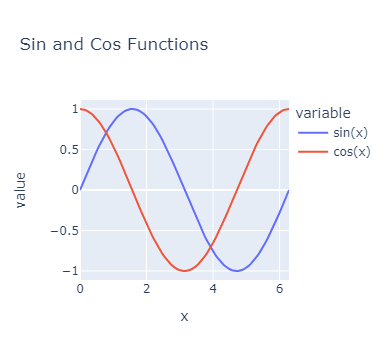

In [77]:
import pandas as pd
import plotly.express as px
import numpy as np

# 创建一个包含sin和cos函数值的数据框
x = np.linspace(0, 2*np.pi, 100)
df = pd.DataFrame({'x': x, 'sin(x)': np.sin(x), 'cos(x)': np.cos(x)})

# 使用plotly绘制sin和cos函数曲线
fig = px.line(df, x='x', y=['sin(x)', 'cos(x)'], title='Sin and Cos Functions')
fig.show()

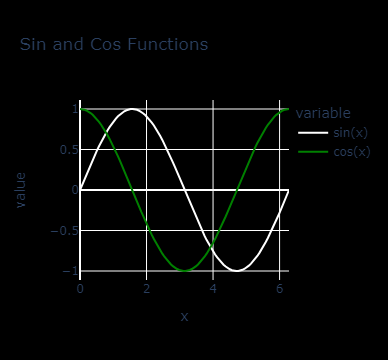

In [78]:
import pandas as pd
import plotly.express as px
import numpy as np

# 创建一个包含sin和cos函数值的数据框
x = np.linspace(0, 2*np.pi, 100)
df = pd.DataFrame({'x': x, 'sin(x)': np.sin(x), 'cos(x)': np.cos(x)})

# 使用plotly绘制sin和cos函数曲线
fig = px.line(df, x='x', y=['sin(x)', 'cos(x)'], title='Sin and Cos Functions')

# 更新线条颜色和背景颜色
fig.update_traces(line=dict(color='white'), selector=dict(name="sin(x)"))
fig.update_traces(line=dict(color='green'), selector=dict(name="cos(x)"))
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black')

# 显示图表
fig.show()

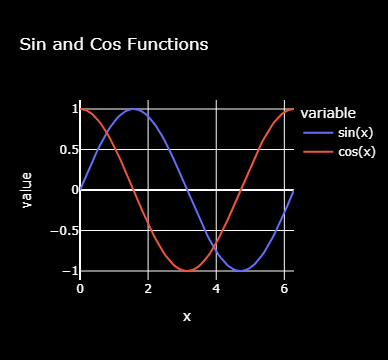

In [79]:
import pandas as pd
import plotly.express as px
import numpy as np

# 创建一个包含sin和cos函数值的数据框
x = np.linspace(0, 2*np.pi, 100)
df = pd.DataFrame({'x': x, 'sin(x)': np.sin(x), 'cos(x)': np.cos(x)})

# 使用plotly绘制sin和cos函数曲线
fig = px.line(df, x='x', y=['sin(x)', 'cos(x)'], title='Sin and Cos Functions')

# 更新线条颜色和背景颜色
# fig.update_traces(line=dict(color='white'))
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black')

# 更新图表的字体颜色为白色
fig.update_layout(
    title_font_color='white',
    legend_title_font_color='white',
    legend_font_color='white',
    xaxis=dict(title_font=dict(color='white'), tickfont=dict(color='white')),
    yaxis=dict(title_font=dict(color='white'), tickfont=dict(color='white'))
)

# 显示图表
fig.show()

**user**

我想要把这两张图的蓝色线变成白色线，红色线变成绿色线，背景变成黑色的风格，请帮我优化一下：

**assistant**

为了更改图表中线条的颜色和背景颜色，你可以在绘制图表时指定颜色样式。以下是针对你的两个图表的代码，分别更改了线条颜色和背景颜色：

对于第一个图表（正弦和余弦函数）：

```python
import pandas as pd
import plotly.express as px
import numpy as np

# 创建一个包含sin和cos函数值的数据框
x = np.linspace(0, 2*np.pi, 100)
df = pd.DataFrame({'x': x, 'sin(x)': np.sin(x), 'cos(x)': np.cos(x)})

# 使用plotly绘制sin和cos函数曲线
fig = px.line(df, x='x', y=['sin(x)', 'cos(x)'], title='Sin and Cos Functions')

# 更新线条颜色和背景颜色
fig.update_traces(line=dict(color='white'), selector=dict(name="sin(x)"))
fig.update_traces(line=dict(color='green'), selector=dict(name="cos(x)"))
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black')

# 显示图表
fig.show()
```
代码中，`update_traces` 方法用于更改线条颜色，而 `update_layout` 方法用于设置图表的背景颜色。`plot_bgcolor` 设置了图表的绘图区域背景颜色，而 `paper_bgcolor` 设置了整个图表背景颜色。在 `update_traces` 方法中，我们使用了 `selector` 参数来指定哪条线需要更改颜色。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["14437b03-7e8a-4f74-ad7c-8f2a2f1bb98b"]</div>

In [2]:
# 我如何将plotly图表的所有legend等字体变成白色？因为背景很黑：

**assistant**

在Plotly中，您可以通过`update_layout`方法中的`legend`参数来更新图例的字体颜色。为了将所有的文字（包括图例、标题和轴标签）都变为白色，您需要分别设置`title_font_color`、`legend_title_font_color`、`legend_font_color`、以及`xaxis`和`yaxis`的`title_font`和`tickfont`属性。这里是一个示例代码，展示了如何将所有这些文本元素的颜色都设置为白色：

```python
import pandas as pd
import plotly.express as px
import numpy as np

# 生成椭圆曲线的数据
a = 3  # x轴半长轴长度
b = 2  # y轴半长轴长度
t = np.linspace(0, 2*np.pi, 100)  # 角度范围
x = a * np.cos(t)  # x坐标
y = b * np.sin(t)  # y坐标

# 创建DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# 使用Plotly绘制椭圆曲线
fig = px.line(df, x='x', y='y', title='椭圆曲线')

# 更新线条颜色和背景颜色
fig.update_traces(line=dict(color='white'))
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black')

# 更新图表的字体颜色为白色
fig.update_layout(
    title_font_color='white',
    legend_title_font_color='white',
    legend_font_color='white',
    xaxis=dict(title_font=dict(color='white'), tickfont=dict(color='white')),
    yaxis=dict(title_font=dict(color='white'), tickfont=dict(color='white'))
)

# 显示图表
fig.show()
```

这段代码会将椭圆曲线图表中的所有文本元素（包括图例、标题和轴标签）的颜色都设置为白色，以便它们在黑色背景上清晰可见。

<div style="text-align: right; color: lightgray; font-style: italic; font-size: x-small;">_ref || _refs["788b7896-c298-473b-be2e-8f0ffe1dd6f3"]</div>